## 2. Ortogonalūs krypčių laukai

Dviejų pirmos eilės diferencialinių lygčių su ortogonaliais krypčių laukais integralinių kreivių (ar bent pačių krypčių laukų) braižymas. Ortogonalūs krypčių laukai apibrėžti antros paskaitos 9-oje skaidrėje: uždavus vieną diferencialinę lygtį $\ y'=F(x,y),\ $ kitos diferencinės lygties $\ F(x,y)\,y'+1=0\ $ krypčių laukas bus ortogonalus (t.y., $90^o$ statmenas duotos lygties krypčių laukui) kiekviename taške.

Praktiškai tikimasi arba dviejų (statmenų) krypčių laukų braižymo vienoje $(x,y)$-srityje skirtingomis spalvomis, arba panašiai, dviejų integralinių kreivių šeimų braižymo vienoje $(x,y)$-srityje.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

np.seterr(divide="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [102]:
def CauchyProblem(F, x0, y0, x):
    N = x.size-1
    N0 = round(N*(x0-x[0])/(x[-1]-x[0]))
    x = x + (x0-x[N0])
    y = np.zeros(N+1)
    y[N0] = y0
    yp = sc.odeint(F, y0, x[N0:])
    yn = sc.odeint(F, y0, x[N0::-1])
    y = np.concatenate( ( yn.flatten()[:0:-1], yp.flatten() ) )
    return (x,y)  

In [105]:
def visualize(F, bounds = [(-1,1), (-1,1)], samples = 20, p = (-0.5,-0.5)):
    X = np.linspace(bounds[0][0], bounds[0][1], samples)
    Y = np.linspace(bounds[1][0], bounds[1][1], samples)

    XS, YS = np.meshgrid(X, Y);

    FY = F(XS, YS)
    
    FX = 1 / np.sqrt(1 + FY**2)
    FY = FX * FY

    XP = np.linspace(bounds[0][0], bounds[0][1], 2 * samples)
    p1 = CauchyProblem(lambda y, x: F(x, y), *p, XP)
    p2 = CauchyProblem(lambda y, x: -1/F(x, y), *p, XP)

    plt.figure(figsize = (6,6))
    
    plt.quiver(XS, YS, FX, FY, color="red", pivot="mid", headaxislength=0, headwidth=0, headlength=0);
    plt.quiver(XS, YS, -FY, FX, color="blue", pivot="mid", headaxislength=0, headwidth=0, headlength=0);

    plt.plot(*p1, color="red")

    # visualizing solution of orthogonal direction field is not visually appealing
    #plt.plot(*p2, color="blue")

    margin = 0.1
    plt.xlim([bounds[0][0] - margin, bounds[0][1] + margin])
    plt.ylim([bounds[1][0] - margin, bounds[1][1] + margin])

    plt.show()

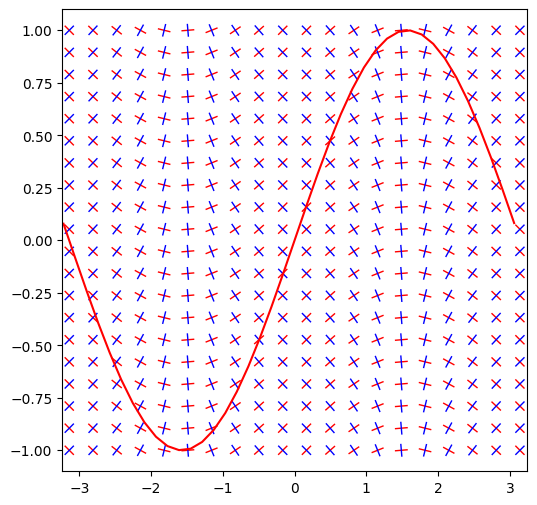

In [106]:
# change parameters here
visualize(
    lambda x, y: np.cos(x),
    bounds = [(-3.14,3.14), (-1,1)],
    p = (0,0))